In [2]:
import pandas as pd
import numpy as np
import datetime as dt

To convert a date to pandas datetime format

In [2]:
dt2 = pd.Timestamp(2021-1-1)
dt3 = pd.to_datetime('2021-1-1')

In [6]:
dates = ['2021-01-01',
'2/1/2021',
'03-01-2021',
'April 1, 2021',
'20210501',
np.datetime64('2021-07-01'), # numpy datetime64
dt.datetime(2021, 8, 1), # python
pd.Timestamp(2021,9,1) # pandas Timestamp
]
print(pd.DatetimeIndex(dates)) # Or pd.to_datetime(dates)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [18]:
parsed_dates=pd.to_datetime('September-23-2020',errors='coerce') #We can give dates in any string format like 'Apr 25 2021','25/04/21'
#error parameter outputs Nan for date format which it cannot handle or interpret
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Day : {parsed_dates.day}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')


Name of Day : nan
Day : nan
Month : nan
Year : nan
Days in Month : nan
Quarter nan
Quarter Start : False
Leap Year : False
Month Start : False
Month End : False
Year Start : False


In [20]:
#giving a range of dates
pd.date_range(start='2021-01-01', periods=3, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [ ]:
#To be more specific, we can provide the format
pd.to_datetime('1/1/2022', format='%m/%d/%Y') #Similar to datetime.strptime()
pd.to_datetime('1 January, 2022', format='%d %B, %Y')

#the function can intelligently pandas.to_datetime() parse different date representations without specifying a format

In [24]:
t = pd.to_datetime(1635220133.855169, unit='s')
t

Timestamp('2021-10-26 03:48:53.855169024')

In [26]:
week_td = pd.Timedelta('1W')
pd.to_datetime('1 JAN 2022') + week_td

Timestamp('2022-01-08 00:00:00')

In [27]:
df = pd.DataFrame({'item': ['item1', 'item2', 'item3', 'item4', 'item5','item6'],
'purchase_dt': pd.date_range('2021-01-01', periods=6,freq='D', tz='UTC')})
df['1 week'] = pd.Timedelta('1W') #See how this column looks
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']
df.head()

,item,purchase_dt,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00


Timedelta_range function, gives a range of deltas

In [28]:
df = pd.DataFrame(
{
'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
'purchase_dt': pd.date_range('2021-01-01', periods=5,freq='D', tz='UTC'),
'time_deltas': pd.timedelta_range('1W 2 days 6 hours',periods=5)})
df

,item,purchase_dt,time_deltas
0,item1,2021-01-01 00:00:00+00:00,9 days 06:00:00
1,item2,2021-01-02 00:00:00+00:00,10 days 06:00:00
2,item3,2021-01-03 00:00:00+00:00,11 days 06:00:00
3,item4,2021-01-04 00:00:00+00:00,12 days 06:00:00
4,item5,2021-01-05 00:00:00+00:00,13 days 06:00:00


In [3]:
df = pd.DataFrame(
{
'Location': ['Los Angeles',
'New York',
'Berlin',
'New Delhi',
'Moscow',
'Tokyo',
'Dubai'],
'tz': ['US/Pacific',
'US/Eastern',
'Europe/Berlin',
'Asia/Kolkata',
'Europe/Moscow',
'Asia/Tokyo',
'Asia/Dubai'],
'visit_dt': pd.date_range(start='22:00',periods=7,
freq='45min'),
}).set_index('visit_dt')
df

,Location,tz
visit_dt,,
2023-12-30 22:00:00,Los Angeles,US/Pacific
2023-12-30 22:45:00,New York,US/Eastern
2023-12-30 23:30:00,Berlin,Europe/Berlin
2023-12-31 00:15:00,New Delhi,Asia/Kolkata
2023-12-31 01:00:00,Moscow,Europe/Moscow
2023-12-31 01:45:00,Tokyo,Asia/Tokyo
2023-12-31 02:30:00,Dubai,Asia/Dubai


Before using timezone functins like "tz_convert()" , we need to localize the df to make it timezone aware

In [4]:
df = df.tz_localize('UTC')
df_hq = df.tz_convert('Asia/Tokyo')
df_hq

,Location,tz
visit_dt,,
2023-12-31 07:00:00+09:00,Los Angeles,US/Pacific
2023-12-31 07:45:00+09:00,New York,US/Eastern
2023-12-31 08:30:00+09:00,Berlin,Europe/Berlin
2023-12-31 09:15:00+09:00,New Delhi,Asia/Kolkata
2023-12-31 10:00:00+09:00,Moscow,Europe/Moscow
2023-12-31 10:45:00+09:00,Tokyo,Asia/Tokyo
2023-12-31 11:30:00+09:00,Dubai,Asia/Dubai


In [6]:
df['local_dt'] = df.index
df['local_dt'] = df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)
df

,Location,tz,local_dt
visit_dt,,,
2023-12-30 22:00:00+00:00,Los Angeles,US/Pacific,2023-12-30 14:00:00-08:00
2023-12-30 22:45:00+00:00,New York,US/Eastern,2023-12-30 17:45:00-05:00
2023-12-30 23:30:00+00:00,Berlin,Europe/Berlin,2023-12-31 00:30:00+01:00
2023-12-31 00:15:00+00:00,New Delhi,Asia/Kolkata,2023-12-31 05:45:00+05:30
2023-12-31 01:00:00+00:00,Moscow,Europe/Moscow,2023-12-31 04:00:00+03:00
2023-12-31 01:45:00+00:00,Tokyo,Asia/Tokyo,2023-12-31 10:45:00+09:00
2023-12-31 02:30:00+00:00,Dubai,Asia/Dubai,2023-12-31 06:30:00+04:00


In [7]:
df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz,local_dt
visit_dt,,,
2023-12-30 22:00 PM,Los Angeles,US/Pacific,2023-12-30 14:00:00-08:00
2023-12-30 22:45 PM,New York,US/Eastern,2023-12-30 17:45:00-05:00
2023-12-30 23:30 PM,Berlin,Europe/Berlin,2023-12-31 00:30:00+01:00
2023-12-31 00:15 AM,New Delhi,Asia/Kolkata,2023-12-31 05:45:00+05:30
2023-12-31 01:00 AM,Moscow,Europe/Moscow,2023-12-31 04:00:00+03:00
2023-12-31 01:45 AM,Tokyo,Asia/Tokyo,2023-12-31 10:45:00+09:00
2023-12-31 02:30 AM,Dubai,Asia/Dubai,2023-12-31 06:30:00+04:00


In [10]:
np.random.seed(10)
df = pd.DataFrame({'purchase_dt': pd.date_range('2021-01-01',periods=6, freq='D'),
'production' : np.random.randint(4, 20, 6)}).set_index('purchase_dt')
df['day']=df.index.day_name()
df

,production,day
purchase_dt,,
2021-01-01,13,Friday
2021-01-02,17,Saturday
2021-01-03,8,Sunday
2021-01-04,19,Monday
2021-01-05,4,Tuesday
2021-01-06,5,Wednesday


In [12]:
#Get the next Business day
df['business_date']=df.index + pd.offsets.BDay(0)
#shift the purchase_dt to next business day instead of saturday or sundays
df['business_day']=df['business_date'].dt.day_name()
df

,production,day,business_date,business_day
purchase_dt,,,,
2021-01-01,13,Friday,2021-01-01,Friday
2021-01-02,17,Saturday,2021-01-04,Monday
2021-01-03,8,Sunday,2021-01-04,Monday
2021-01-04,19,Monday,2021-01-04,Monday
2021-01-05,4,Tuesday,2021-01-05,Tuesday
2021-01-06,5,Wednesday,2021-01-06,Wednesday


In [13]:
#track production monthly (MonthEnd) and quarterly (QuarterEnd)
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
df['BusinessDay'] = df.index + pd.offsets.BDay(0)

In [ ]:
df.describe(include='all',datetime_is_numeric=True)
#Note the use of to replace the default value None. The default include='all' behavior is to show summary statistics for only numeric columns. By changing the
#value to 'all', the results will include all column types.

#Replace null values
df.replace(0, np.NaN, inplace=True)

##Time series modelling

In [2]:
import pandas as pd
from statsmodels.tools.eval_measures import rmspe, rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
life=pd.read_csv("/content/drive/MyDrive/Data/TimeSeries/life_expectancy_birth.csv")
life['year'] = pd.to_datetime(life['year'])
life.set_index("year",inplace=True)
life.head(10)

,value
year,
1960-01-01,69.123902
1961-01-01,69.760244
1962-01-01,69.149756
1963-01-01,69.248049
1964-01-01,70.311707
1965-01-01,70.171707
1966-01-01,70.926098
1967-01-01,70.956585
1968-01-01,70.780000


<Axes: xlabel='year'>

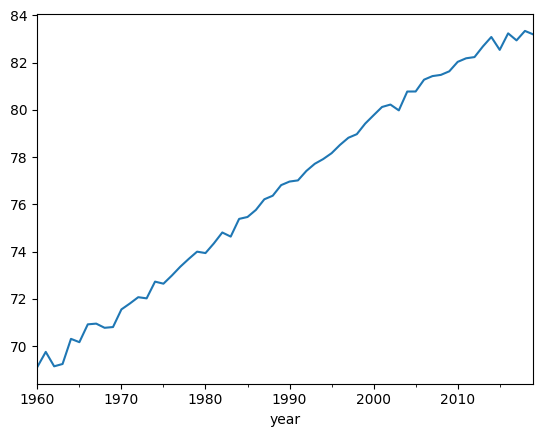

In [3]:
life["value"].plot()

Check if data is stationary or not using , by looking at. it we can tell that the series doesnt look stationary

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def check_stationarity(col):
  result = adfuller(col.dropna()) # Drop NA values to ensure the test runs smoothly
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():print('\t%s: %.3f' % (key, value))

  if result[0] < result[4]["5%"]:
    print("The series is Stationary.")
    return "Stationary", result[0]
  else:print("The series is NOT Stationary.")
  return "Non-Stationary", result[0]

check_stationarity(life["value"])

ADF Statistic: -1.578590
p-value: 0.494339
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
The series is NOT Stationary.


('Non-Stationary', -1.5785902570090407)

In [12]:
life_diff=life.diff().dropna() #Drops first na column after differencing
life_diff.head(10)

,value
year,
1961-01-01,0.636341
1962-01-01,-0.610488
1963-01-01,0.098293
1964-01-01,1.063659
1965-01-01,-0.140000
1966-01-01,0.754390
1967-01-01,0.030488
1968-01-01,-0.176585
1969-01-01,0.031951


<Axes: xlabel='year'>

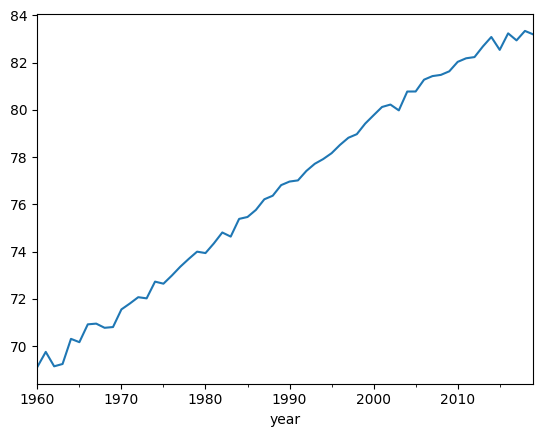

In [13]:
life["value"].plot()

The diffrencing time series is still not stationary . This time, you must perform first-order differencin
(detrend). When the time series data contains seasonality and trend, you may need
to difference it twice to make it stationary.

<Axes: xlabel='year'>

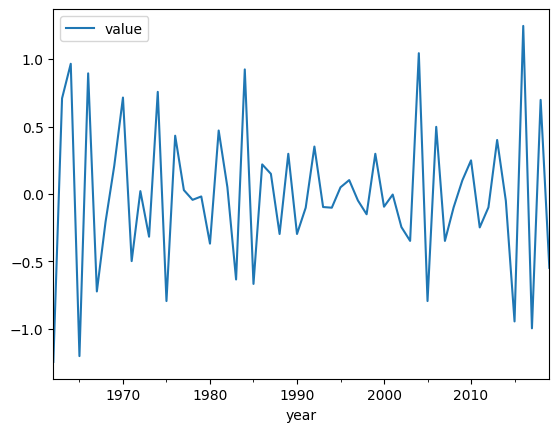

In [14]:
diff_2=life.diff(1).diff(1).dropna()
diff_2.plot()

In [15]:
check_stationarity(diff_2["value"])

ADF Statistic: -7.449389
p-value: 0.000000
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
The series is Stationary.


('Stationary', -7.449389033657941)

The series is now stationary

ADF Statistic: -1.578590
p-value: 0.494339
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
The series is NOT Stationary.
ADF Statistic: -8.510100
p-value: 0.000000
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
The series is Stationary.
ADF Statistic: -7.449389
p-value: 0.000000
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
The series is Stationary.


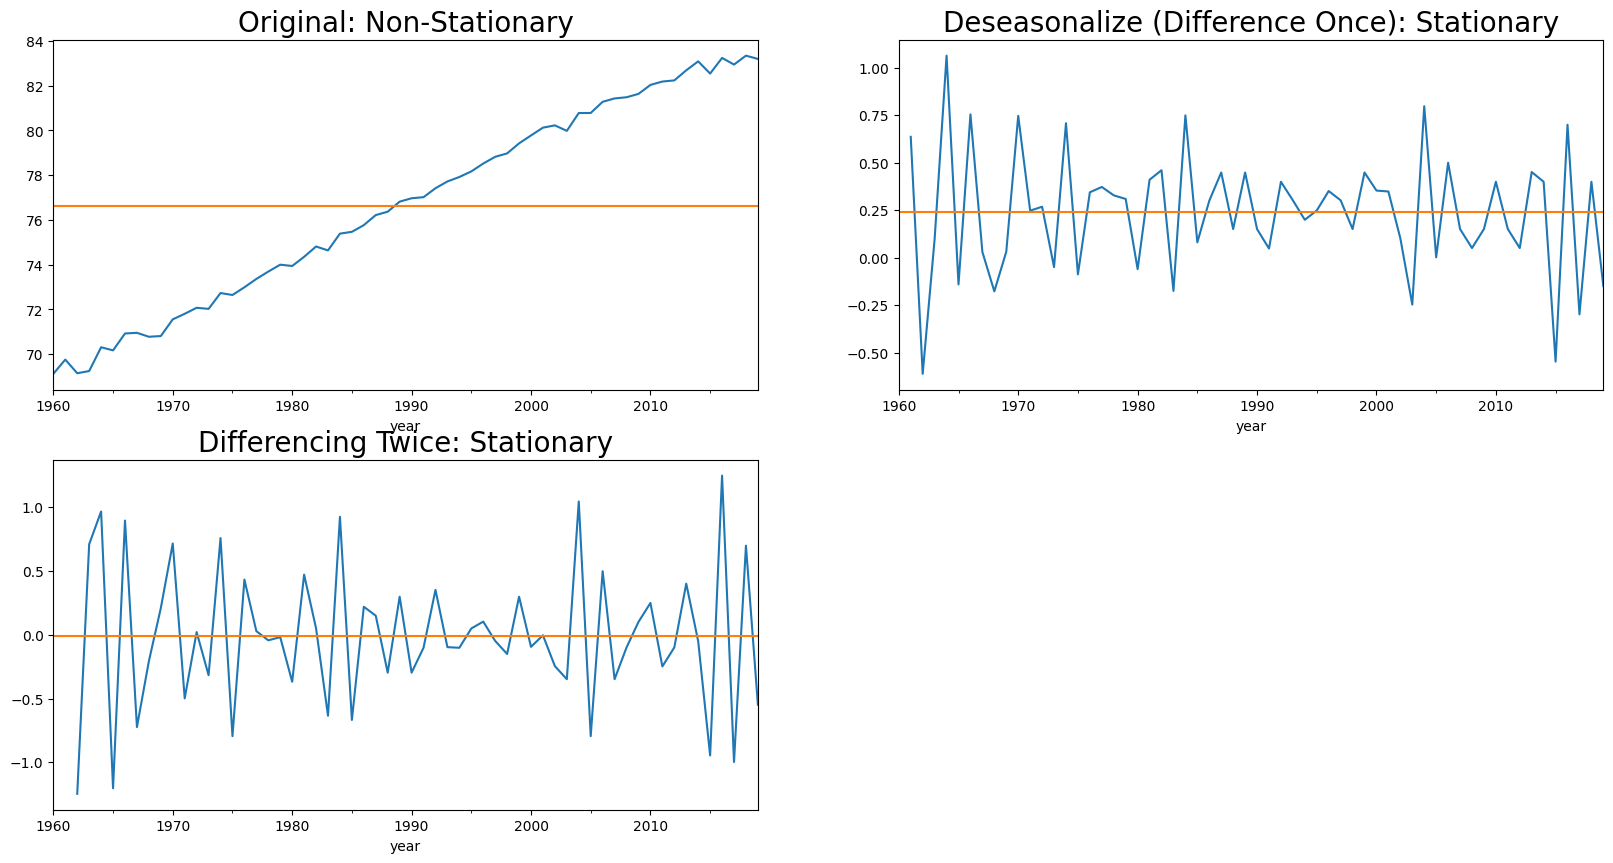

In [20]:
import matplotlib.pyplot as plt

life_dif_12 = life.diff(1).dropna()
life_dif_12_1 = life.diff(1).diff(1).dropna()
sets = [life, life_dif_12, life_dif_12_1]
desc = ['Original', 'Deseasonalize (Difference Once)',
'Differencing Twice']
fig, ax = plt.subplots(2,2, figsize=(20,10))
index, l = life.index, life.shape[0]
for i, (d_set, d_desc) in enumerate(zip(sets, desc)):
  v, r = i // 2, i % 2
  outcome, pval = check_stationarity(d_set)
  d_set.plot(ax= ax[v,r], title=f'{d_desc}: {outcome}',
  legend=False)
  pd.Series(d_set.mean().values.tolist()*l,
  index=index).plot(ax=ax[v,r])
  ax[v,r].title.set_size(20)
ax[1,1].set_visible(False)
plt.show()


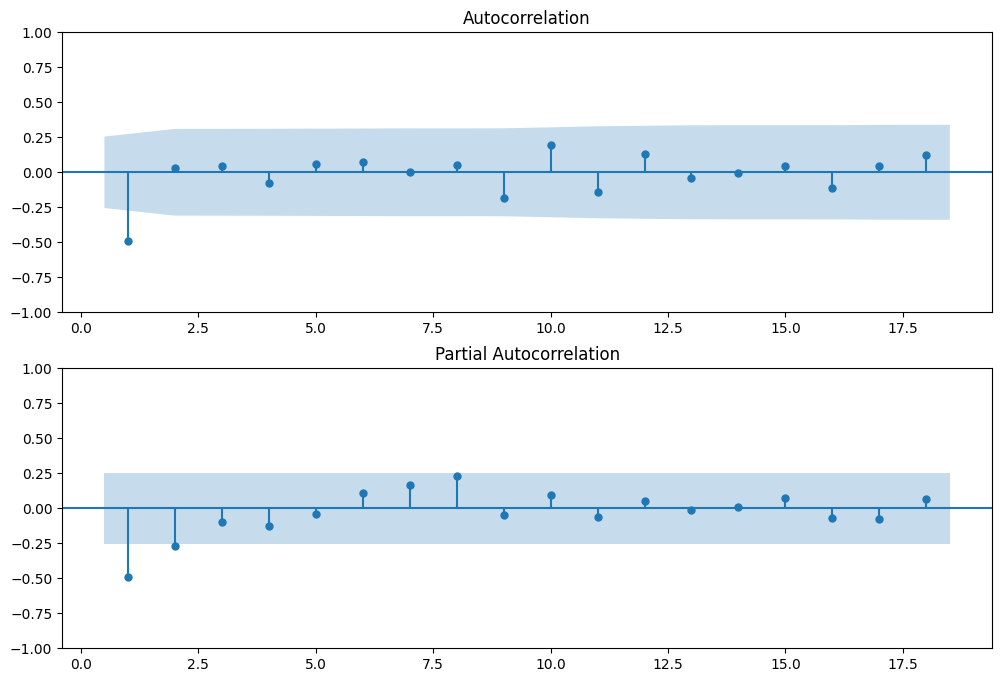

In [8]:
import matplotlib.pyplot as plt
# from stats_model import plot_pacf,plot_acf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(life_diff, zero=False, ax=ax[0]) #ACF used for getting MA lag
plot_pacf(life_diff, zero=False, ax=ax[1]) #PACF is used for getting AR lag
plt.show()

In ACF only lag one is outside the confidence interval and shows some significance. So MA lag will be 1 .Generally, if PACF shows a
gradual decay, it indicates a moving average model. In PACF as well lag 1 is significant, so AR lag is 1 as well. IF the lag in ACF is decreasing slowly, then we can set a higher lag value, indicating that there is a higher autocorellation between current and past order variables  

Let's see how ACF plots can be used
to diagnose the model's residuals.If the model captured all the information that's been embedded within the
time series, you would expect the residuals to have no autocorrelation. When the residuals show autocorrelation, this
can mean that the model did not capture all the information, and there is potential for
further improvement

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


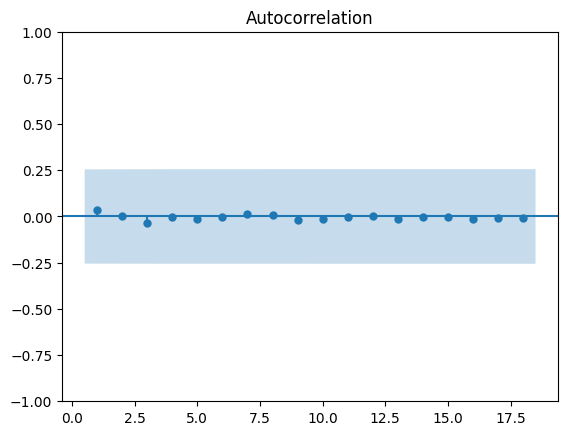

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(life, order=(1,2,1)).fit()
plot_acf(model.resid[1:], zero=False)
plt.show()

Exponential Smoothing

we can use AIC(Akaike Information Criterion) to compare different  models and chose the one that fits the best . The model with lowest AIC score is picked . This ensures that we have best balance between model complexity and goodness-of-fit to data . Helps in avoiding over and underfitting

In [22]:
!pip install darts --quiet
from darts.models import ExponentialSmoothing
from darts import TimeSeries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB

train: 51 , test: 9


<Axes: xlabel='year'>

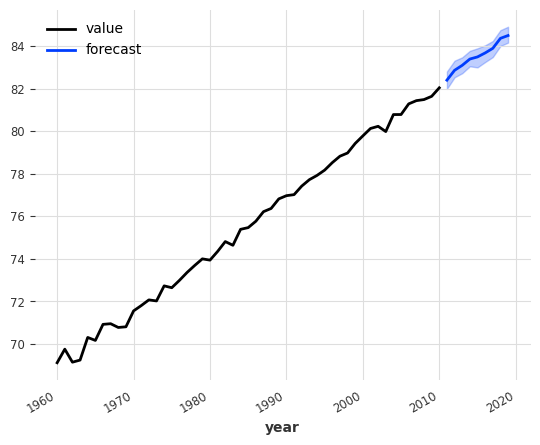

In [26]:
model = ExponentialSmoothing(seasonal_periods=12)
ts = TimeSeries.from_dataframe(life.reset_index(),time_col='year', value_cols='value',freq='YS')
train, test = split_data(ts, 0.15)
result= model.fit(train)
forecast = model.predict(len(test), num_samples=100)
train.plot()
forecast.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)

In [27]:
model.model.summary()

Dep. Variable:,endog,No. Observations:,51
Model:,ExponentialSmoothing,SSE,1.952
Optimized:,True,AIC,-134.412
Trend:,Additive,BIC,-103.503
Seasonal:,Additive,AICC,-113.037
Seasonal Periods:,12,Date:,"Mon, 01 Jan 2024"
Box-Cox:,False,Time:,19:15:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,8.5311e-10,beta,True


In [1]:
# result.plot_diagnostics();plt.show()

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing
from itertools import product
from pprint import pprint
def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]
    return combo
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test
life_train, life_test = split_data(life, 0.2)
trend = ['add', 'mul']
damped = [True, False]
life_ex_comb = combinator([trend, damped])
life_ex_comb
train = life_train.values.ravel()
y = life_test.values.ravel()
score = {}
for i, (t, dp) in enumerate(life_ex_comb):
  exp = ExponentialSmoothing(train,trend=t,damped_trend=dp,seasonal=None)
  model = exp.fit(use_brute=True, optimized=True)
  y_hat = model.forecast(len(y))
  score[i] = {'trend':t,'damped':dp,'AIC':model.aic,'BIC':model.bic,
  'AICc':model.aicc,'RMSPE': rmspe(y, y_hat),'RMSE' : rmse(y, y_hat),
  'MAPE' : mape(y, y_hat),'model': model}
pprint(score,width=5)

train: 48 , test: 12
{0: {'AIC': -128.0906498553507,
     'AICc': -125.29064985535071,
     'BIC': -118.73464480081125,
     'MAPE': 0.006290538571026944,
     'RMSE': 0.6321043610738472,
     'RMSPE': 0.07622045935003491,
     'damped': True,
     'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x7c8bda392cb0>,
     'trend': 'add'},
 1: {'AIC': -138.42785398737874,
     'AICc': -136.37907349957385,
     'BIC': -130.94304994374718,
     'MAPE': 0.007561148952792879,
     'RMSE': 0.7515980473494902,
     'RMSPE': 0.09060510216973729,
     'damped': False,
     'model': <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper object at 0x7c8bda393c40>,
     'trend': 'add'},
 2: {'AIC': -130.05526746663466,
     'AICc': -127.25526746663466,
     'BIC': -120.69926241209521,
     'MAPE': 0.008410287177576964,
     'RMSE': 0.8137961431783766,
     'RMSPE': 0.0981252299497738,
     'damped': True,
     'model': <statsmodels.tsa.holtwinters.results.HoltW

<Axes: xlabel='year'>

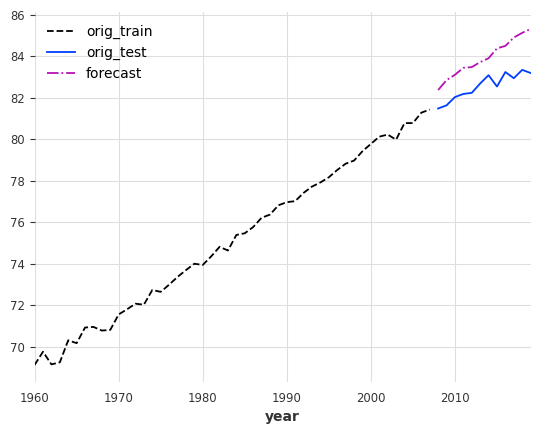

In [44]:
def plot_forecast(model, start, train, test):
    pr=model.predict(test.shape[0])
    lst=[v[0] for v in pr.values()]
    forecast = pd.DataFrame(lst, index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    # plt.show()
    return ax
plot_forecast(result, '1960', life_train, life_test)

##Multivariate time series modelling

In [22]:
import pandas_datareader.data as web
from statsmodels.tsa.api import VAR,adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests

In [32]:
# start = "01-01-1990"
# end = "04-01-2022"
# economic_df = web.FredReader(symbols=["FEDFUNDS","unrate"], start=start, end=end).read()
file = '/content/drive/MyDrive/Data/TimeSeries/economic_df.pickle'
# economic_df.to_pickle(file)
economic_df=pd.read_pickle(file)
economic_df.head(5)

,FEDFUNDS,unrate
DATE,,
1990-01-01,8.23,5.4
1990-02-01,8.24,5.3
1990-03-01,8.28,5.2
1990-04-01,8.26,5.4
1990-05-01,8.18,5.4


**FEDFUNDS**, for the federal funds rate "is the interest
rate at which depository institutions trade federal funds (balances held at Federal Reserve
Banks) with each other overnight. The second symbol is **unrate** for the Unemployment Rate.

In [33]:
ed=economic_df.reset_index()
ed.describe(include="all") # include="all" give info for categorical columns as well

<ipython-input-33-e65d8ea73b1e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ed.describe(include="all") # include="all" give info for categorical columns as well


,DATE,FEDFUNDS,unrate
count,388,388.000000,388.000000
unique,388,NaN,NaN
top,1990-01-01 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,1990-01-01 00:00:00,NaN,NaN
last,2022-04-01 00:00:00,NaN,NaN
mean,NaN,2.710747,5.875258
std,NaN,2.385921,1.721218
min,NaN,0.050000,3.500000
25%,NaN,0.180000,4.600000


In [36]:
economic_df.index.freq="MS" #set frequency to month start

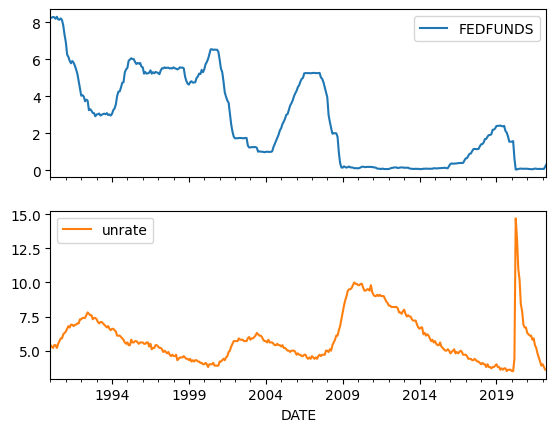

In [37]:
economic_df.plot(subplots=True); plt.show()

An important assumption in VAR(Vector Auto regressive model) is **stationarity**. Both variables (the
two endogenous time series) need to be stationary.

In [38]:
def check_stationarity(df):
  kps = kpss(df)
  adf = adfuller(df)
  kpss_pv, adf_pv = kps[1], adf[1]
  kpssh, adfh = 'Stationary', 'Non-stationary'
  if adf_pv < 0.05:
    # Reject ADF Null Hypothesis
    adfh = 'Stationary'
  if kpss_pv < 0.05:
    # Reject KPSS Null Hypothesis
    kpssh = 'Non-stationary'
  return (kpssh, adfh)
for i in economic_df:
  kps, adf = check_stationarity(economic_df[i])
  print(f'{i} adf: {adf}, kpss: {kps}')

FEDFUNDS adf: Stationary, kpss: Non-stationary
unrate adf: Stationary, kpss: Stationary


<ipython-input-38-cb43cc7f6aca>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(df)
<ipython-input-38-cb43cc7f6aca>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(df)


Next, **examine the causality** to determine if one time series influences the other
(can FEDFUNDS be used to forecast our time series of interest, which is unemp?).

**Granger causality tests** performs four tests across each past
lag. You can control this using the maxlag parameter. Granger causality tests are used to determine if past values from one variable influence the other variable. In
statsmodels, at each lag, it will show the tests that have been performed and their
results: the test statistics score, the p-value, and the degrees of freedom. Let's focus
on the p-value to decide if you should reject or accept the null hypothesis.
The null hypothesis in the Granger causality tests is that the second variable
or column (that is, FEDFUNDS) does not Granger cause the first variable or column
(that is, unrate). In other words, it assumes there is no statistical significance in
terms of influence or effect. If you are trying to predict unrate and determine if
FEDFUNDS influences unrate, you will need to switch the order of the columns
before applying the test. This is because grangercausalitytests examines the
second column against the first column:

In [40]:
granger = grangercausalitytests(economic_df[['unrate','FEDFUNDS']], maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5415  , p=0.4623  , df_denom=384, df_num=1
ssr based chi2 test:   chi2=0.5457  , p=0.4601  , df=1
likelihood ratio test: chi2=0.5454  , p=0.4602  , df=1
parameter F test:         F=0.5415  , p=0.4623  , df_denom=384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.6287 , p=0.0000  , df_denom=381, df_num=2
ssr based chi2 test:   chi2=43.8250 , p=0.0000  , df=2
likelihood ratio test: chi2=41.5108 , p=0.0000  , df=2
parameter F test:         F=21.6287 , p=0.0000  , df_denom=381, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.5527 , p=0.0000  , df_denom=378, df_num=3
ssr based chi2 test:   chi2=65.8554 , p=0.0000  , df=3
likelihood ratio test: chi2=60.7928 , p=0.0000  , df=3
parameter F test:         F=21.5527 , p=0.0000  , df_denom=378, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=16.1117 , p=0.0000  

We can see that all the lags (except for lag 1) have a p-value less than 0.05, which indicates
that we can reject the null hypothesis. This means that the effect of FEDFUNDS is
statistically significant. We can say that FEDFUNDS does Granger cause unrate.

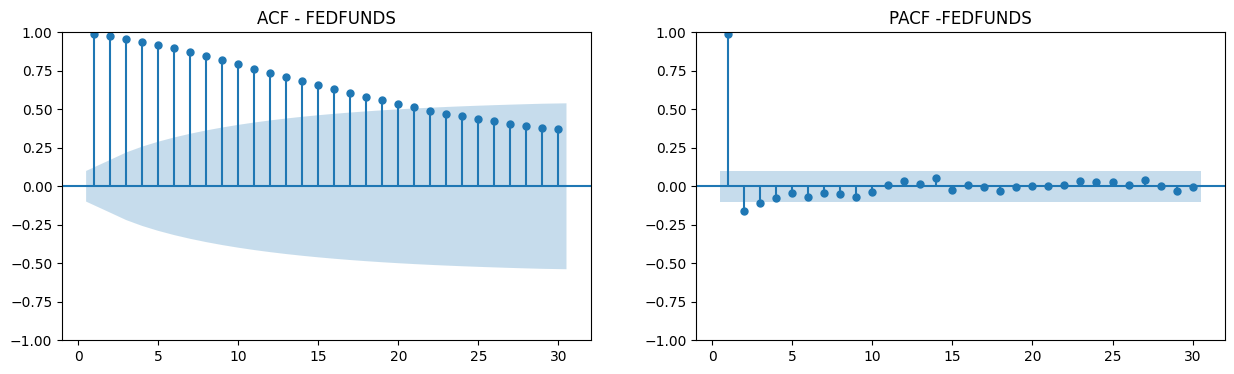

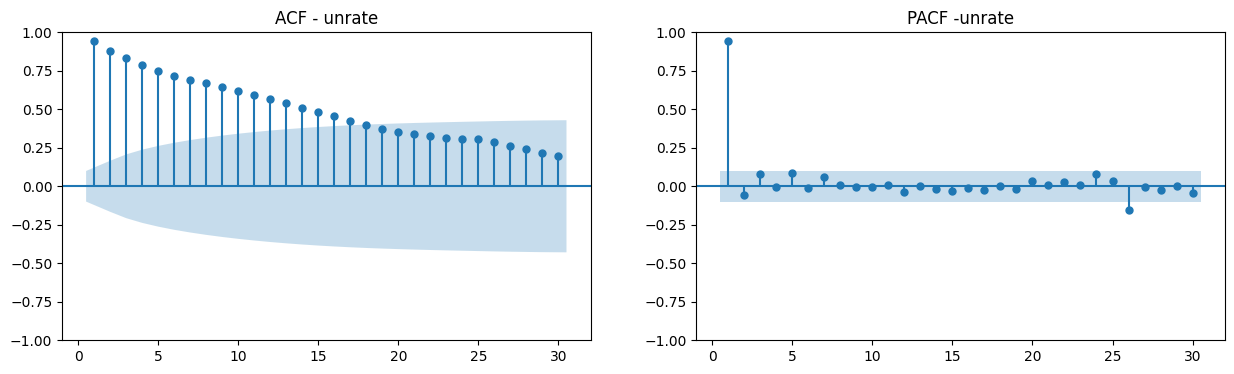

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

for col in economic_df.columns:
  fig, ax = plt.subplots(1,2, figsize=(15,4))
  plot_acf(economic_df[col], zero=False,
  lags=30, ax=ax[0], title=f'ACF - {col}')
  plot_pacf(economic_df[col], zero=False,
  lags=30, ax=ax[1], title=f'PACF -{col}');
  plt.show()

Before implementing any model, we can scale the data in order to make the variables easier to compare since the units will be in standard deviation

In [44]:
train = economic_df.loc[:'2019']
test = economic_df.loc['2020':]
print(f'Train: {len(train)}, Test: {len(test)}')

Train: 360, Test: 28


In [45]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

train_sc = pd.DataFrame(scale.fit_transform(train), index=train.index, columns=train.columns)
test_sc = pd.DataFrame(scale.transform(test), index=test.index, columns=test.columns)

VAR model automatically selects the appropriate p value, we just need to give the maxlags. select_order function prints out all the AIC, BIC, FPE, and HQIC for each lag order

In [46]:
model = VAR(endog=train_sc, freq='MS')
res = model.select_order(maxlags=10)
res.summary()

,AIC,BIC,FPE,HQIC
0,-0.3450,-0.3229,0.7083,-0.3362
1,-9.984,-9.918,4.611e-05,-9.958
2,-10.50,-10.39,2.746e-05,-10.46
3,-10.55,-10.40,2.613e-05,-10.49
4,-10.60,-10.40*,2.490e-05,-10.52*
5,-10.60,-10.35,2.500e-05,-10.50
6,-10.62,-10.33,2.447e-05,-10.50
7,-10.65*,-10.32,2.379e-05*,-10.51
8,-10.63,-10.25,2.421e-05,-10.48
9,-10.62,-10.20,2.447e-05,-10.45


In [48]:
res.selected_orders

{'aic': 7, 'bic': 4, 'hqic': 4, 'fpe': 7}

Let's pick AIc score and fit the model, can experiment with other scores later.

In [50]:
result=model.fit(ic='aic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Jan, 2024
Time:                     23:47:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.3148
Nobs:                     353.000    HQIC:                  -10.5127
Log likelihood:           906.792    FPE:                2.38598e-05
AIC:                     -10.6434    Det(Omega_mle):     2.19544e-05
--------------------------------------------------------------------
Results for equation FEDFUNDS
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.002763         0.002959           -0.934           0.350
L1.FEDFUNDS         1.438838         0.053660           26.814           0.000
L1.unrate          -0.070386         0.033673           -2.090   

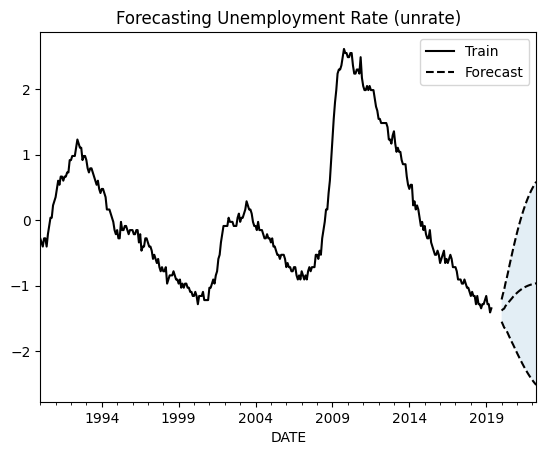

In [54]:
lag_order = result.k_ar
past_y = train_sc[-lag_order:].values
n = test_sc.shape[0]
forecast, lower, upper = result.forecast_interval(past_y, steps=n)
idx = test.index; style = 'k--'
ax = train_sc.iloc[:-lag_order, 1].plot(style='k')
pred_forecast = pd.Series(forecast[:, 1], index=idx).plot(ax=ax, style=style)
pred_lower = pd.Series(lower[:, 1], index=idx).plot(ax=ax, style=style)
pred_upper = pd.Series(upper[:, 1], index=idx).plot(ax=ax, style=style)
plt.fill_between(idx, lower[:,1], upper[:,1], alpha=0.12)
plt.title('Forecasting Unemployment Rate (unrate)')
plt.legend(['Train','Forecast']);plt.show()

##Forecasting and Modeling **changes in variance** over time:**Volatility**

Autoregressive Conditional Heteroskedasticity (ARCH) algorithm models
the change in variance over time as a function of squared error terms of
a time series. An extension of ARCH is the GARCH model, which stands for Generalized
Autoregressive Conditional Heteroskedasticity. It extends ARCH by adding a moving
average component.

Components of ARCH model:


1.   Autoregressive
2.   Heteroskedastic
3.  Conditional, since volatility is not fixed, the reference here is on the constant that
we place in the model to limit heteroskedasticity and make it conditionally
dependent on the previous value or values of the variable.



In [1]:
!pip install sktime --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 8.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [3]:
daily_temp = pd.read_csv('/content/drive/MyDrive/Data/TimeSeries/daily_weather.csv', index_col='DateTime', parse_dates=True)
daily_temp.head(5)

,Temperature
DateTime,
2009-01-01,-6.810629
2009-01-02,-3.360486
2009-01-03,5.435694
2009-01-04,7.283889
2009-01-05,12.690069


In [4]:
daily_temp.columns=['y']
daily_temp.describe(include='all')

,y
count,2921.000000
mean,9.438993
std,7.840078
min,-16.457292
25%,3.808333
50%,9.708333
75%,15.444722
max,29.375347


<Axes: title={'center': 'Avg Daily Weather Temperature in C'}, xlabel='DateTime'>

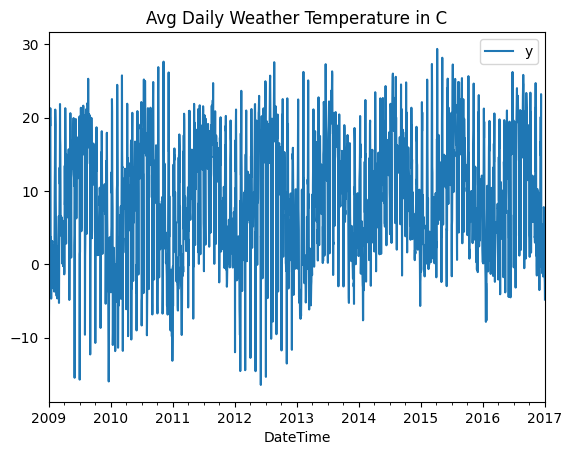

In [5]:
daily_temp.index.freq = 'D'
daily_temp.plot(title='Avg Daily Weather Temperature in C')

##Forecasting with Exogenous variables and ensemble learning



* Exogenous variables refer to external factors or influences that affect the time series but are not part of the series itself. These are variables that can help explain or predict changes in the time series, but they are not generated as a part of the time series process.
*  Exogenous variables are incorporated into time series models to improve forecasting accuracy. Models like ARIMA (AutoRegressive Integrated Moving Average) can be extended to ARIMAX or SARIMAX (Seasonal ARIMA with eXogenous variables) to include these external factors




In [1]:
!pip install sktime --quiet
from sktime.forecasting.all import EnsembleForecaster
from sklearn.svm import SVR
from sktime.transformations.series.detrend import ConditionalDeseasonalizer
from sktime.datasets import load_macroeconomic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 7.0 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [2]:
econ = load_macroeconomic()
cols = ['realgdp','realdpi','tbilrate', 'unemp', 'infl']
econ_df = econ[cols]
econ_df.head(5)

,realgdp,realdpi,tbilrate,unemp,infl
Period,,,,,
1959Q1,2710.349,1886.9,2.82,5.8,0.00
1959Q2,2778.801,1919.7,3.08,5.1,2.34
1959Q3,2775.488,1916.4,3.82,5.3,2.74
1959Q4,2785.204,1931.3,4.33,5.6,0.27
1960Q1,2847.699,1955.5,3.50,5.2,2.31


WE are predicting the unemployment rate

In [3]:
econ_df.shape

(203, 5)

In [4]:
econ_df.describe(include="all")

,realgdp,realdpi,tbilrate,unemp,infl
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,7221.171901,5310.540887,5.311773,5.884729,3.961330
std,3214.956044,2423.515977,2.803071,1.458574,3.253216
min,2710.349000,1886.900000,0.120000,3.400000,-8.790000
25%,4440.103500,3276.950000,3.515000,4.900000,2.270000
50%,6559.594000,4959.400000,5.010000,5.700000,3.240000
75%,9629.346500,6977.850000,6.665000,6.800000,4.975000
max,13415.266000,10077.500000,15.330000,10.700000,14.620000


In [5]:
econ_df.index.min(),econ_df.index.max()

(Period('1959Q1', 'Q-DEC'), Period('2009Q3', 'Q-DEC'))

In [7]:
econ_df.isna().sum()

realgdp     0
realdpi     0
tbilrate    0
unemp       0
infl        0
dtype: int64

In [10]:
def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test

In [11]:
y = econ_df['unemp']
exog = econ_df.drop(columns=['unemp'])
test_size = 0.1
y_train, y_test = split_data(y, test_split=test_size)
exog_train, exog_test = split_data(exog, test_split=test_size)

In [14]:
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import (RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
regressors = [("LinearRegression", make_reduction(LinearRegression())),
("RandomForest", make_reduction(RandomForestRegressor())),
("SupportVectorRegressor", make_reduction(SVR())),
("GradientBoosting", make_reduction(GradientBoostingRegressor()))]

In [17]:
from sktime.forecasting.all import (
        Deseasonalizer, Detrender,
        temporal_train_test_split,
        mean_absolute_percentage_error as mape,
        mean_squared_percentage_error as mspe,
        mean_squared_error as mse,
        ForecastingHorizon,
        NaiveForecaster,
        TransformedTargetForecaster,
        PolynomialTrendForecaster
)
ensemble = EnsembleForecaster(regressors)
naive= NaiveForecaster()
ensemble.fit(y=y_train, X=exog_train)
naive.fit(y=y_train, X=exog_train)

NaiveForecaster()

The naïve forecast for a time series is just the value of the last observation

In [26]:
import pandas as pd
fh = ForecastingHorizon(y_test.index, is_relative=None)
y_hat = pd.DataFrame(y_test).rename(columns={'unemp':'test'})
y_hat['EnsembleForecaster'] = ensemble.predict(fh=fh,X=exog_test)
y_hat['RandomForest'] = naive.predict(fh=fh, X=exog_test)
y_hat.head(5)

,test,EnsembleForecaster,RandomForest
Period,,,
2004Q4,5.4,5.163812,5.4
2005Q1,5.3,5.123695,5.4
2005Q2,5.1,5.127586,5.4
2005Q3,5.0,5.155139,5.4
2005Q4,4.9,5.068674,5.4


Scale Independence: MASE is not dependent on the scale of the data, which makes it particularly useful for comparing forecast accuracy between different time series.

Interpretability: A MASE value of less than 1 means the forecast is better than the naïve forecast, while a value greater than 1 indicates worse performance than the naïve forecast.

Applicability: MASE is effective in situations where the data has a non-constant mean or variance, and for intermittent demand forecasting.

Robustness: Being based on the MAE, MASE is less sensitive to outliers compared to metrics based on squared errors.

In [29]:
from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError,
                                                   MeanSquaredError,
                                                   MeanAbsoluteScaledError)
import numpy as np
mse = MeanSquaredError()
mape = MeanAbsolutePercentageError()
mase = MeanAbsoluteScaledError()
def evaluate(df,train, sort_by='MASE'):
    evals = pd.DataFrame(index=['sMAPE', 'MAPE', 'RMSE'])
    y_truth = df['y']
    y_predicted = df.drop(columns=['y'])
    for p in y_predicted:
        evals.loc['sMAPE', p] = mape(y_truth, y_predicted[p], symmetric=True)
        evals.loc['MAPE', p] = mape(y_truth, y_predicted[p], symmetric=False)
        evals.loc['RMSE', p] = np.sqrt(mse(y_truth, y_predicted[p]))
        evals.loc['MASE', p] = mase(y_truth, y_predicted[p],y_train=train)
    return evals.T.sort_values(by=sort_by)

y_hat.rename(columns={'test':'y'}, inplace=True)
evaluate(y_hat,y_test)

/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/usr/local/lib/python3.10/dist-packages/sktime/performance_metrics/forecasting/_classes.py:467: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorre

,sMAPE,MAPE,RMSE,MASE
EnsembleForecaster,0.140447,0.137673,1.225373,2.642352
RandomForest,0.170823,0.160553,1.544021,3.187097


Emsemble methods do better than Naive forecaster

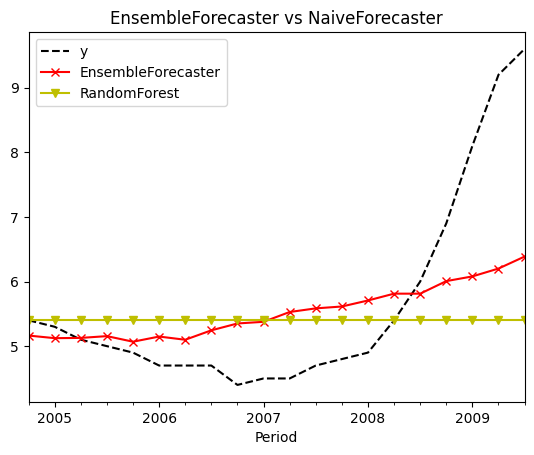

In [32]:
import matplotlib.pyplot as plt
styles = ['k--','rx-','yv-']
for col, s in zip(y_hat, styles):
  y_hat[col].plot(style=s, label=col,title='EnsembleForecaster vs NaiveForecaster' )
plt.legend();plt.show()

The AutoEnsembleForecaster class in sktime behaves similar to the
EnsembleForecaster class you used earlier. The difference is that the
AutoEnsembleForecaster class will calculate the optimal weights for each
of the regressors passed. The AutoEnsembleForecaster class has a regressor
parameter that takes a list of regressors and estimates a weight for each class. In
other words, not all regressors are treated equal. If none are provided, then the
GradientBoostingRegressor class is used instead, with a default max_depth=5.

##Forecasting using RNN Pytorch

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams["figure.figsize"] = [12, 6]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ##
plt.rc('axes', titlesize=16)               ##
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ##

In [3]:
energy = pd.read_csv('/content/drive/MyDrive/Data/TimeSeries/energy_consumption.csv',
                     index_col='Month',
                     parse_dates=True)
energy.columns = ['y']

In [4]:
energy.head(5)

,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [7]:
energy.index.freq="MS"
print(energy.index.freq)

<MonthBegin>


In [13]:
def one_step_forecast(df, window):
    d = df.values
    x = []
    n = len(df)
    idx = df.index[:-window]
    for start in range(n-window):
        end = start + window
        x.append(d[start:end])
    cols = [f'x_{i}' for i in range(1, window+1)]
    x = np.array(x).reshape(n-window, -1)
    y = df.iloc[window:].values
    df_xs = pd.DataFrame(x, columns=cols, index=idx)
    df_y = pd.DataFrame(y.reshape(-1), columns=['y'], index=idx)
    return pd.concat([df_xs, df_y], axis=1).dropna()
class Standardize:
    def __init__(self, df, split=0.10):
        self.data = df
        self.split = split

    def split_data(self):
        n = int(len(self.data) * self.split)
        train, test = self.data.iloc[:-n], self.data.iloc[-n:]
        n = int(len(train) * self.split)
        train, val = train.iloc[:-n], train.iloc[-n:]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val

    def _transform(self, data):
        data_s = (data - self.mu)/self.sigma
        return data_s

    def fit_transform(self):
        train, test, val = self.split_data()
        self.mu, self.sigma = train.mean(), train.std()
        train_s = self._transform(train)
        test_s = self._transform(test)
        val_s = self._transform(val)
        return train_s, test_s, val_s

    def inverse(self, data):
        return (data * self.sigma)+self.mu

    def inverse_y(self, data):
        return (data * self.sigma[-1])+self.mu[-1]

In [14]:
en_df=one_step_forecast(energy,10)
scale_en = Standardize(en_df)
train_en, test_en, val_en = scale_en.fit_transform()

In [15]:
def features_target_pt(*args):
    y = [torch.from_numpy(col.pop('y').values.reshape(-1,1)).float() for col in args]
    x = [torch.from_numpy(col.values.reshape(*col.shape, 1)).float()
                   for col in args]
    return *y, *x
(y_train_en,
y_val_en,
y_test_en,
x_train_en,
x_val_en,
x_test_en) = features_target_pt(train_en,
                             val_en,
                             test_en)

In [29]:
train_en.head(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
Month,,,,,,,,,,
1973-01-01,1.118720,0.507261,0.004482,-0.808452,-1.251283,-1.484292,-1.374274,-1.299552,-1.447473,-1.349164
1973-02-01,0.506976,0.003648,-0.809875,-1.249810,-1.479131,-1.367094,-1.293247,-1.442843,-1.344346,-0.785830
1973-03-01,0.003463,-0.810497,-1.251372,-1.477541,-1.362129,-1.286201,-1.436291,-1.339893,-0.782146,0.060552
1973-04-01,-0.810520,-1.251879,-1.479174,-1.360599,-1.281372,-1.429008,-1.333519,-0.778658,0.062531,0.836245
1973-05-01,-1.251814,-1.479622,-1.362195,-1.279884,-1.423940,-1.326406,-0.773254,0.064569,0.836661,0.188542


In [30]:
y_train_en[:10]

tensor([[-0.7908],
        [ 0.0571],
        [ 0.8343],
        [ 0.1854],
        [-0.1634],
        [-0.7577],
        [-1.2905],
        [-1.5098],
        [-1.3186],
        [-1.3849]])

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In RNN, the whole time series with with a date range in one single sequence, hence the batch size will be 1. Meaning there is only one instance of the sequence lenght equal to the length of time series and input dimension is number of featrues at a single time step. **(1, len(dataframe), len(features))**

rnn_o is the output from rnn at every timestep so the shape will be **(1,len(df),hidden_dim)**

In [41]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = n_features
        self.rnn = nn.RNN(input_size, n_features, n_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(n_features, output_size)

    def forward(self, x, hn):
        # batch_first=True -> (batch_size, seq_length, input_size)
        x = x.view(1, x.shape[0], x.shape[1])
        # print(x.size())
        rnn_o, hn = self.rnn(x, hn)
        # print("rnn_o size: ",rnn_o.size(),hn.size())
        rnn_o = self.dropout(rnn_o)
        # reshape to feed it to linear layer
        rnn_o = rnn_o.view(-1, self.hidden_dim)
        output = self.fc(rnn_o)
        return output, hn

    def init_hidden(self):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, 1, self.hidden_dim).zero_()
        # print("H0: ",hidden)
        # print(hidden.size())
        return hidden

In [42]:
def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['input_size'],
                    kwargs['output_size'],
                    kwargs['units'],
                    kwargs['n_layers'])
    # elif model_type=='LSTM':
    #     model = LSTM(kwargs['input_size'],
    #                 kwargs['output_size'],
    #                 kwargs['units'],
    #                 kwargs['n_layers'])
    # elif model_type=='GRU':
    #      model = LSTM(kwargs['input_size'],
    #                 kwargs['output_size'],
    #                 kwargs['units'],
    #                 kwargs['n_layers'])

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])

    x_train, y_train = kwargs['train_data']
    x_val, y_val  = kwargs['val_data']
    x_test, y_test = kwargs['test_data']

    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs = kwargs['epochs']
    print_every = kwargs['print_every']

    for batch_i, epoch in enumerate(range(epochs)):
        h = model.init_hidden()
        optimizer.zero_grad()
        pred, h = model(x_train, h) #model(x_train)
        #hidden = hidden.data
        loss = criterion(pred, y_train)
        loss.backward()
        optimizer.step()
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h = model.init_hidden()
                val_p, val_h = model(x_val, val_h)
                val_loss = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')

    ## Prediction
    model.eval()
    with torch.no_grad():
        h0 = model.init_hidden()
        y_hat = model(x_test, h0)
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')

    ## Plotting
    fig, ax = plt.subplots(2, 1)

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    actual = scale.inverse_y(y_test.detach().numpy().ravel())
    pred = scale.inverse_y(y_hat.detach().numpy().ravel())
    idx = kwargs['idx']
    pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65)
    pd.Series(pred, index=idx).plot(style='k', label='forecast')
    fig.tight_layout()
    ax[1].legend(); plt.show()

    return model, history

0/500 - Loss:  1.008164644241333, val_loss: 0.8265857696533203
20/500 - Loss:  0.10948950052261353, val_loss: 0.17516332864761353
40/500 - Loss:  0.08531266450881958, val_loss: 0.15218761563301086
60/500 - Loss:  0.057971831411123276, val_loss: 0.15247714519500732
80/500 - Loss:  0.057713985443115234, val_loss: 0.14487305283546448
100/500 - Loss:  0.05243239924311638, val_loss: 0.14537928998470306
120/500 - Loss:  0.052936162799596786, val_loss: 0.14261363446712494
140/500 - Loss:  0.04873988777399063, val_loss: 0.1384926736354828
160/500 - Loss:  0.046066418290138245, val_loss: 0.13871422410011292
180/500 - Loss:  0.05012562870979309, val_loss: 0.13532860577106476
200/500 - Loss:  0.04570625722408295, val_loss: 0.14283062517642975
220/500 - Loss:  0.0500757209956646, val_loss: 0.14928501844406128
240/500 - Loss:  0.04142647236585617, val_loss: 0.14957380294799805
260/500 - Loss:  0.0396265871822834, val_loss: 0.13950411975383759
280/500 - Loss:  0.04297376796603203, val_loss: 0.144261

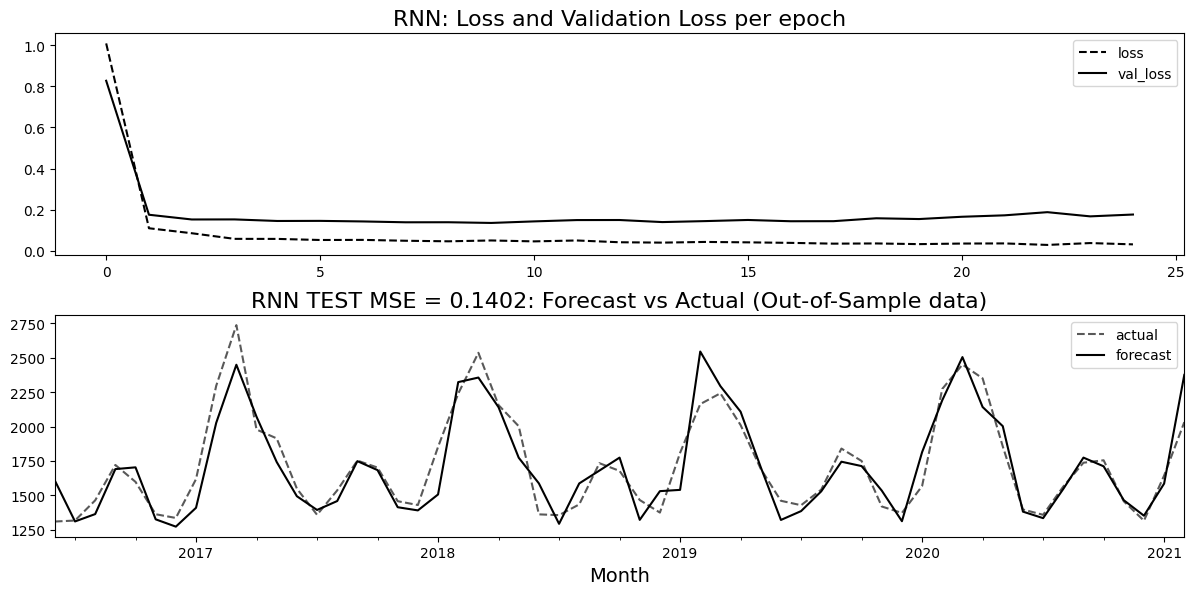

In [43]:
params_en = {'input_size':x_train_en.shape[1],
'output_size':1,
'units':32,
'n_layers':1,
'epochs': 500,
'print_every': 20,
'lr': 0.01,
'train_data': (x_train_en, y_train_en),
'val_data': (x_val_en, y_val_en),
'test_data': (x_test_en, y_test_en),
'idx': test_en.index,
'scale': scale_en}

en_rnn, history_en_rnn = train_model_pt('RNN', **params_en)

##State space models (SSM)

In time series data, the central idea behind SSMs is that of latent variables, also called
states, which are continuous and sequential through the time-space domain. \\
One key
aspect of their popularity is their flexibility and ability to work with complex time series
data that can be multivariate, non-stationary, non-linear, or contain multiple seasonality,
gaps, or irregularities.

 In addition, SSMs can be generalized and come in various forms, several of which make
use of Kalman filters (Kalman recursions). The benefit of using SSMs in time series
data is that they are used in filtering, smoothing, or forecasting,